# Final Exam, MTH 5401
# Graf, Nathan J.

1. (4 points) Problem 12-56 a), b), & c)
2. (4 points) Problem 12-94 all parts but NOT a) ; use alpha to enter = .15 and alpha to leave = .15
3. (4 points) Problem 13-8 a), b), & c); problem and chart is on page 556.
4. (4 points) Problem 13-36 a), b), c), and d)
5. (2 points) Problem 13-48 a) use alpha = .05
6. (4 points) Problem 14-2 a), b), & c)
7. (4 points) Problem 14-16 (should say 2^5, not 25 in the problem) do a) and b)
8. (4 points) Problem 14-36 a) and b) {i.e. are any factors significant}
9. (3 points) Problem 14-69 a) and b); use Y = 15 + 1.6X1 – 3.2X2 + 2.1X3 – 1.6X4 instead of the first-order model in the book.
10. (2 points) Problem 14-52 a) and b) 

## 1. (12-56 a, b, c)

### 12-56 a) 95% CI for $\beta_{1}$, $\beta_{2}$, $\beta_{3}$, and $\beta_{4}$


In [3]:
import pandas as pd

data = pd.read_csv('12_55.csv')
data

FileNotFoundError: File b'12_55.csv' does not exist

In [4]:
import numpy as np
np.mat(data[['x0', 'x1', 'x2', 'x3', 'x4']])

NameError: name 'data' is not defined

In [ ]:
X = np.mat(data[['x0', 'x1', 'x2', 'x3', 'x4']])
Y = np.mat(data['y'])
print(X)
print(Y)

In [ ]:
regressors = ((X.transpose()*X)**-1)*X.transpose()*Y.transpose()

In [ ]:
regressors

In [ ]:
import statsmodels.formula.api as sm

data1 = data[['x1', 'x2', 'x3', 'x4', 'y']]
result = sm.ols(formula='y~x1+x2+x3+x4', data=data1).fit()

print(result.params)

In [ ]:
print(result.resid)

In [ ]:
resids = result.resid
n = 12
p = 4
variance = (resids**2).sum()/(n-p)
variance

In [ ]:
# SSE = y'y - BhatX'y
# but Bhat is actually the transpose of the previous Bhat
# it is a row, not a column
beta_hat = np.mat(result.params)
SSE = Y*Y.transpose() - beta_hat*X.transpose()*Y.transpose()
n = 12
p = 4

variance = SSE/(n - p)
variance

In [ ]:
from scipy import stats
# calculate t value
alpha = 0.05

t_a = abs(stats.t.ppf(alpha/2, n-p))
t_a

In [ ]:
import math 

C = (X.transpose() * X)**-1

# loop from 0 - 3 and calculate intervals
for i in range(1, p+1):
    lower = beta_hat[0, i] - t_a * math.sqrt(variance*C[i,i])
    upper = beta_hat[0, i] + t_a * math.sqrt(variance*C[i,i])
    print('{} <= B{} <= {}'.format(lower, i, upper))

In other words the Confidence intervals for $\hat{\beta_{i}}$ $i \in 1, 2, 3, 4$ are:   
$0.15527 \leq \hat{\beta_{1}} \leq 1.3593$  
$-1.1313 \leq \hat{\beta_{2}} \leq 16.169$  
$-1.4199 \leq \hat{\beta_{3}} \leq 6.3860$  
$-1.6787 \leq \hat{\beta_{4}} \leq 0.71641$  

### 12-56 (b)  95% CI on mean of Y for $x_1 = 75, x_2 = 24, x_3 = 90, x_4 = 98$ 


In [ ]:
#t_a and most of the data is the same, for the formula, we construct a vector of the x-values
X_0 = np.mat([1, 75, 24, 90, 98]).transpose()
X_0

In [ ]:
# mu_hat is predicted value
mu_hat = beta_hat*X_0

# formula mu_hat +- t*sqrt(variance*X_0'(X'X)**-1)
lower = mu_hat - t_a * math.sqrt(variance*X_0.transpose()*C[i,i]*X_0)
upper = mu_hat + t_a * math.sqrt(variance*X_0.transpose()*C[i,i]*X_0)
print('{} <= mu_Y|X_0 <= {}'.format(lower, upper))

$105.28 \leq \mu_{Y|x{0}} \leq 475.60$  

### 12-56 (c) 95% prediction

In [ ]:
# formula y_hat(mu_hat) +- t*sqrt(variance*X_0'(X'X)**-1)
lower = mu_hat - t_a * math.sqrt(variance*(1 + X_0.transpose()*C[i,i]*X_0))
upper = mu_hat + t_a * math.sqrt(variance*(1 + X_0.transpose()*C[i,i]*X_0))
print('{} <= Y_0 <= {}'.format(lower, upper))

$103.54 \leq \mu_{Y_0} \leq 477.34$  

## 2. (12-94 (not a))

### 12-94 (b) stepwise regression ($\alpha$ to leave = 0.15

In [ ]:
# import data
data = pd.read_csv('12_12.csv')
Y = np.mat(data['y']).transpose()
X = np.mat(data[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']])

In [ ]:
data1 = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y']]
result = sm.ols(formula='y~x1+x2+x3+x4+x5+x6', data=data1).fit()


In [ ]:
data1.columns

In [ ]:
result.rsquared

In [ ]:
# let's cycle through the variables and choose the strongest one
for var in data1.columns[:-1]:
    form = 'y~' + var
    result = sm.ols(formula=form, data=data1).fit()
    message = 'for ' + var
    message += ' the correlation is: '
    message += str(result.fvalue)
    print(message)

In [ ]:
# let's cycle through the variables and choose the strongest one
for var in data1.columns[:-1]:
    form = 'y~x3 + ' + var
    result = sm.ols(formula=form, data=data1).fit()
    message = 'for ' + var
    message += ' the correlation is: '
    message += str(result.pvalues)
    print(message)

In [ ]:
import statsmodels.api as sm

X = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
y = data['y']


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.15, 
                       threshold_out = 0.15, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

The variables added using stepwise regression were $x_{3}$ and $x_{4}$

### 12-94 (c) Forward Selection

Since none of the variables got removed from the stepwise regression, forward selection will have identical results:
the resulting regressors are $x_{3}$ and $x_{4}$

### 12-94 (d) Backward Elimination



In [ ]:
# import data
data = pd.read_csv('12_12.csv')
Y = np.mat(data['y']).transpose()
X = np.mat(data[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']])
data1 = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y']]
result = sm.formula.ols(formula='y~x1+x2+x3+x4+x5+x6', data=data1).fit()
print(result.summary())

In [ ]:
# remove x2 and try again since it had the highest p-value
result = sm.formula.ols(formula='y~x1+x3+x4+x5+x6', data=data1).fit()
print(result.summary())

In [ ]:
# remove x6 and try again since it had the highest p-value
result = sm.formula.ols(formula='y~x1+x3+x4+x5', data=data1).fit()
print(result.summary())

In [ ]:
# remove x5 and try again since it had the highest p-value
result = sm.formula.ols(formula='y~x1+x3+x4', data=data1).fit()
print(result.summary())

Finally, with a *p*-value of 0.301, we remove x1.

In [ ]:
# remove x2 and try again since it had the highest p-value
result = sm.formula.ols(formula='y~x3+x4', data=data1).fit()
print(result.summary())

We are left with x3 and x4, just like before.

### 12-94 (e) All the models ended up the same. With only 2 regressors and much lower *p*-values, a model with x3 and x4 would be the most preferred.

## 3. 13-8 

### 13-8 (a) $\alpha = 0.01$

In [ ]:
data = pd.DataFrame({'1': [19, 22, 20, 18, 25], 
                     '2': [20, 21, 33, 27, 40], 
                     '3': [16, 15, 18, 26, 17]})
f_val, p_val = stats.f_oneway(data['1'], data['2'], data['3'])

data.boxplot()

print("f_0 is: " + str(f_val) )
print("p-value is: " + str(p_val) )

With a *p*-value of 0.0465, do not reject $H_{0}$. 

### 13-8 (b) Analyze residuals:


In [ ]:
# new list of lists of residuals
residuals = []
allresids = []

# for each column of the dataframe
for treatment in data:
    # new list of residuals
    resids = []
    # calculate mean of the treatmen
    mean = data[treatment].mean()
    # for each observation
    for i in data[treatment]:
        # calculate and append the residual
        resids.append( i - mean )
        allresids.append( i - mean )
    # append treatment residuals to experiment residuals
    residuals.append(resids)
    
residuals = pd.DataFrame({'1': residuals[0], '2': residuals[1], '3': residuals[2]})

residuals

In [ ]:
from matplotlib import pyplot as plt

coords, z = stats.probplot(residuals.unstack(), plot=plt)
x = coords[0]
y = coords[1]

plt.scatter(x, y)
plt.show()

In [ ]:
residuals.plot.density()

In [ ]:
residuals.boxplot()

There are some issues with the residuals. There appears to be more variation in the type 2 circuit. Also, the type 3 has a signifcant outlier. 

### 12-8 (c) 95% CI for mean response time on circuit 3

Formula:
$\bar{y}_{i.} - t_{\alpha/2,a(n-1)}\sqrt{MSE/n} \leq \mu_{i} \leq \bar{y}_{i.} + t_{\alpha/2,a(n-1)}\sqrt{MSE/n}$

In [ ]:
# constants
a = 3
n = 5

y_bar = data['3'].mean()

# calculate t value
alpha = 0.025

t_a = abs(stats.t.ppf(alpha/2, a*(n-1)))
t_a

In [ ]:
# calculate SSE
SSE = 0
for treatment in data:
    mean = data[treatment].mean()
    for i in data[treatment]:
        SSE += (i - mean) ** 2
SSE

In [ ]:
# calculate MSE
MSE = SSE/(a*(n-1))
MSE

In [ ]:
from math import sqrt

# calculate lower and upper bounds of confidence interval
lower = y_bar - t_a * sqrt(MSE/n)
upper = y_bar + t_a * sqrt(MSE/n)

print('The 95% confidence interval is ' + str(lower) + ' <= ' + 'mu_3' + ' <= ' + 
     str(upper) + '.')

## 4. 13-36

### 13-36 (a) Test for significance, $\alpha = 0.01$.

In [5]:
data = pd.read_csv('13_36.csv')

#data = pd.DataFrame({'1': [98, 97, 99, 96], '2': [91, 90, 93, 92], 
 #                    '3': [96, 95, 97, 95], '4': [95, 96, 99, 98]})

#f_val, p_val = stats.f_oneway(data['1'], data['2'], data['3'], data['4'])

f_val, p_val = stats.f_oneway(data['1'], data['2'], data['3'], data['4'], data['5'], data['6'])



print("f_0 is: " + str(f_val) )
print("p-value is: " + str(p_val) )

FileNotFoundError: File b'13_36.csv' does not exist

With a *p*-value of 0.0044, reject $H_{0}$

### 13-36 (b) Estimate variability between batches

In [ ]:
# means and totals
batch_means = data.mean()
batch_totals = data.sum()
total = batch_totals.sum()
total_mean = batch_means.mean()

# total number of measurements
n = len(data)
N = data.count().sum()
a = N / n

In [ ]:
a

In [ ]:
# get sums of squares to calculate ANOVA manually


# SST is difference between each measurement squared
# and the mean squared over N
SST = 0

for batch in data:
    for i in data[batch]:
        SST += ( i - total_mean ) **2
        
SST

In [ ]:
# SStr is total treatment square over number in treatment
SStr = 0 

for batch in batch_means:
    SStr += ( batch - total_mean ) **2
    
SStr = SStr * n    
SStr

In [ ]:
# SSE = SST = SStr
SSE = SST - SStr
SSE

In [ ]:
# degrees of freedom
# df of random factor (looms) = a - 1
df_factor = a -1

# df of error = a(n-1), where a is the number of factors
# and n is the number of observations per factor
df_error = a*(n-1)

# MStr = SStr / df_factor
# MSE = SSE / df_error
MStr = SStr / df_factor
MSE = SSE / df_error
F_0 = MStr/MSE
F_0

In [ ]:
# variance due to batches is estimated by: 
# (MStr - MSE) / n

(MStr - MSE) / n

The variability between batches is estimated at $1764.05$.  
### 13-36 (c) Estimate variability between samples within batches

This would be estimated by the mean square error, $MSE = 2451.25$

In [ ]:
MSE

### 13-36 (d) Analyze residuals

In [ ]:
# new list of lists of residuals
residuals = []

# for each column of the dataframe
for treatment in data:
    # new list of residuals
    resids = []
    # calculate mean of the treatmen
    mean = data[treatment].mean()
    # for each observation
    for i in data[treatment]:
        # calculate and append the residual
        resids.append( i - mean )
    # append treatment residuals to experiment residuals
    residuals.append(resids)
    
residuals = pd.DataFrame({'1': residuals[0], '2': residuals[1], 
                         '3': residuals[2], '4': residuals[3], '5': residuals[4]})

residuals

In [ ]:
from matplotlib import pyplot as plt

coords, z = stats.probplot(residuals.unstack(), plot=plt)
x = coords[0]
y = coords[1]

plt.scatter(x, y)
plt.show()

In [ ]:
residuals.plot.density()

In [ ]:
residuals.boxplot()

The residuals look mostly reasonable. Most of the residuals plot near the normal probability plot line. By the density plots and boxplots, it is possible that the variation is not consistent across the batches.  

## 5. (13-48 )

### 13-48 (a) Test for differences, $\alpha = 0.05$

In [ ]:
data = pd.read_csv('13_48.csv')
data

In [ ]:
# For RCBD, we get the totals for each block
# in addition to each treatment
tr_means = data.mean()
tr_totals = data.sum()
block_means = data.transpose().mean()
block_totals = data.transpose().sum()
total = tr_totals.sum()
total_mean = tr_means.mean()



# total number of measurements
n = len(data)
N = data.count().sum()
a = N / n

# SST is difference between each measurement squared
# and the mean squared over N
SST = 0

for treatment in data:
    for i in data[treatment]:
        SST += ( i - total_mean ) **2
        
# SStr is number of observations times the square of
# the treatment mean minus the total mean
SStr = 0 

for treatment in tr_means:
    SStr += ( treatment - total_mean ) **2
    
SStr = SStr * n    

## SSb is the block means minus the 
SSb = 0

for block in block_means:
    SSb += ( block - total_mean ) **2
    
SSb = SSb * a


# SSE = SST - SStr
SSE = SST - SStr - SSb
SSE

# degrees of freedom
# df of random treatments = a - 1
df_treatments = a - 1

# df of blocks
df_block = n - 1

# df of error = a(n-1), where a is the number of factors
# and n is the number of observations per factor
df_error = (a-1)*(n-1)

# MStr = SStr / df_factor
# MSE = SSE / df_error
MStr = SStr / df_treatments
MSE = SSE / df_error
F_0 = MStr/MSE
F_0

In [ ]:
stats.f.sf(F_0, df_treatments, df_error)

With a *p*-value of 0.00087, reject $H_{0}$. The tip does affect the hardness meaurements.

### 13-48 (b) Use Fisher's LSD to investigate differences.

In [ ]:
# means to compare
tr_means 

In [ ]:
# get t_a/2, error df
alpha = 0.05
t_a = abs(stats.t.ppf(alpha/2, df_error))

In [ ]:
LSD = t_a*math.sqrt(2*MSE/4)
LSD

In [ ]:
# check for differences greater than 0.1508
for i in range(len(tr_means)):
    for j in range(len(tr_means)):
        if i != j:
            diff = tr_means[i] - tr_means[j]
            if abs(diff) > LSD:
                print('|{} - {}| = {} is greater than LSD'.format(i, j, diff ))

Type 4's mean is 0.3 greater than Type 1, 0.275 greater than Type 2, and 0.425 greater than Type 3. The other differences are not significant.

### 13-48 (c) Analyze residuals

In [ ]:
resids = []
treatments = len(data)
blocks = len(data.iloc[0])

for i in range(treatments):
    resids.append([])
    for j in range(blocks):
        fitted_val = tr_means[j] + block_means[i] - total_mean
        resid = data.iloc[i][j] - fitted_val
        resids[i].append(resid)
resids = pd.DataFrame(resids)
resids

In [ ]:
coords, z = stats.probplot(resids.unstack(), plot=plt)
x = coords[0]
y = coords[1]

plt.scatter(x, y)
plt.show()

In [ ]:
#by tip
resids.plot.density()

In [ ]:
#by specimen
resids.transpose().plot.density()

In [ ]:
# by tip
resids.boxplot()

In [ ]:
# by specimen
resids.boxplot()

Overall the variation in the residuals is fairly uniform. Normality assumptions seem to be valid.

## 6. 14-2

### 14-2 (a) 
$H_{0}: \tau_{1} = \tau_{2} = 0$  
$H_{1}:$ at least one $\tau_{i} \neq 0$  
$H_{0}: \beta_{1} = \beta_{2} = \beta_{3} = 0$  
$H_{1}:$ at least one $\beta_{j} \neq 0$  
$H_{0}: (\tau\beta)_{11} = (\tau\beta)_{12} = . . . = (\tau\beta)_{23} = 0$   
$H_{1}:$ at least one $(\tau\beta)_{ij} \neq 0$  

### 14-2 (b)


In [2]:
import pandas as pd
#load data
data = pd.DataFrame({'Paint': [1, 1, 1, 1, 1, 1, 1, 1, 1, 
                               2, 2, 2, 2, 2, 2, 2, 2, 2], 
                     'Time': [1, 2, 3, 1, 2, 3, 1, 2, 3, 
                                  1, 2, 3, 1, 2, 3, 1, 2, 3], 
                     'Finish': [74, 73, 78, 
                                64, 61, 85, 
                                50, 44, 92, 
                                92, 98, 66, 
                                86, 73, 45, 
                                68, 88, 85]})
data

,Paint,Time,Finish
0,1,1,74
1,1,2,73
2,1,3,78
3,1,1,64
4,1,2,61
5,1,3,85
6,1,1,50
7,1,2,44
8,1,3,92
9,2,1,92


In [3]:
total_sum = data['Finish'].sum()
a = 2
b = 3
n = 3
big_mean_square = (total_sum**2) / (a * b * n)
big_mean_square

97093.55555555556

In [4]:
# SST all the responses squared minus big mean square
squares = data['Finish']**2
SST = squares.sum() - big_mean_square
SST

4504.444444444438

In [5]:
flipdata = data.transpose()
# get counts and totals for the means
a1_sum = a2_sum = b1_sum = b2_sum = b3_sum =0
ab11_sum = ab12_sum = ab13_sum = ab21_sum = ab22_sum = ab23_sum = 0
a1_count = a2_count = b1_count = b2_count = b3_count = 0
for i in flipdata:
    col = flipdata[i]
    y = col['Finish']
    if col['Paint'] == 1:
        a1_sum += y
        a1_count += 1
        if col['Time'] == 1:
            b1_sum += y
            b1_count += 1
            ab11_sum += y
        elif col['Time'] == 2:
            b2_sum += y
            b2_count += 1
            ab12_sum += y
        elif col['Time'] == 3:
            b3_sum += y
            b3_count += 1
            ab13_sum += y
    elif col['Paint'] == 2:
        a2_sum += y
        a2_count += 1
        if col['Time'] == 1:
            b1_sum += y
            b1_count +=1
            ab21_sum += y
        elif col['Time'] == 2:
            b2_sum += y
            b2_count += 1
            ab22_sum += y
        elif col['Time'] == 3:
            b3_sum += y
            b3_count += 1
            ab23_sum += y

# calclate means        
a1_mean = a1_sum / a1_count
a2_mean = a2_sum / a2_count
b1_mean = b1_sum / b1_count
b2_mean = b2_sum / b2_count
b3_mean = b3_sum / b3_count



In [6]:
# SSA = sum of each group squared / bn - big_mean_square
SSA = (a1_sum ** 2 + a2_sum ** 2)/(b*n) - big_mean_square
SSA

355.55555555554747

In [7]:
## SSB = sum of each group squared / an - big_mean_square
SSB = (b1_sum ** 2 + b2_sum ** 2 + b3_sum ** 2 )/(a*n) - big_mean_square
SSB

27.444444444437977

In [9]:
# SSAB = sum of each pair of treatments squared / n - big_mean_square
SSAB = (ab11_sum ** 2 + ab12_sum ** 2 + ab13_sum **2 + ab21_sum ** 2 + ab22_sum ** 2 + 
        ab23_sum ** 2) / n - big_mean_square - SSA - SSB
SSAB

1878.777777777781

In [10]:
## SSE = SST - SSA - SSB - SSAB
SSE = SST - SSA - SSB - SSAB
SSE

2242.6666666666715

In [12]:
df_A = a - 1
df_B = b - 1
df_AB = df_A * df_B
df_error = a * b * (n - 1)
print(df_A)
print(df_B)
print(df_AB)
print(df_error)

1
2
2
12


In [13]:
# MSA, MSB, MSAB, MSE = SS/df
MSA = SSA/df_A
MSB = SSB/df_B
MSAB = SSAB/df_AB
MSE = SSE/df_error
F_0A = MSA/MSE
F_0B = MSB/MSE
F_0AB = MSAB/MSE
print('F_0 for Paint Type is {}'.format(F_0A))
print('F_0 for Drying Time is {}'.format(F_0B.round(2)))
print('F_0 for Interaction is {}'.format(F_0AB.round(2)))

F_0 for Paint Type is 1.9024970273483475
F_0 for Drying Time is 0.07
F_0 for Interaction is 5.03


In [14]:
from scipy import stats
# P-values
paint_p = stats.f.sf(F_0A, df_A, df_error)
time_p = stats.f.sf(F_0B, df_B, df_error)
inter_p = stats.f.sf(F_0AB, df_AB, df_error)
print('P-value for Paint is {}'.format(paint_p))
print('P-value for Time is {}'.format(time_p))
print('P-value for Interaction is {}'.format(inter_p))

P-value for Paint is 0.19296255138290022
P-value for Time is 0.9296204787288459
P-value for Interaction is 0.0259592217252373


With *p*-values of $0.193$, $0.930$, and 0.026, the only significant factor is the interaction

### 14-2 (c) Analyze Residuals

In [15]:
# calcluate residuals
# start with cell means
means = [[ab11_sum / n, ab12_sum / n, ab13_sum / n], 
         [ab21_sum / n, ab22_sum / n, ab23_sum / n]]
# add column for residuals
data['Residuals'] = pd.Series(index=data.index)
# now subtract corresponding mean from each value
flipdata = data.transpose()
for row in flipdata:
    col = flipdata[row]
    i = int(col['Paint'] - 1)
    j = int(col['Time'] - 1 )
    col['Residuals'] = col['Finish'] - means[i][j]

data1 = flipdata.transpose()

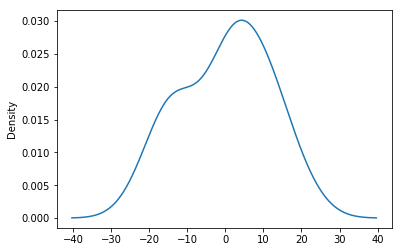

In [19]:
from matplotlib import pyplot as plt
data1.Residuals.plot.density()
plt.show()

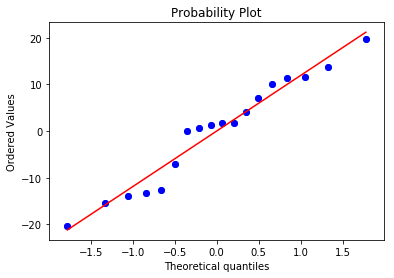

In [20]:
coords, z = stats.probplot(data1.Residuals, plot=plt)
x = coords[0]
y = coords[1]

plt.scatter(x, y)
plt.show()

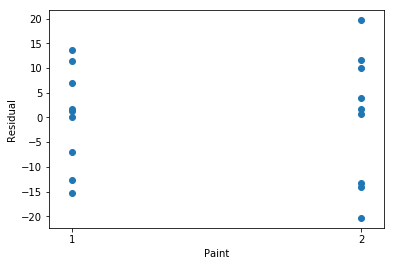

In [26]:
ax = plt.subplot(111)
ax.set_xlabel('Paint')
ax.set_ylabel('Residual')
ax.set_xticks([1, 2, 3], minor=False)
plt.scatter(data1.Paint, data1.Residuals)

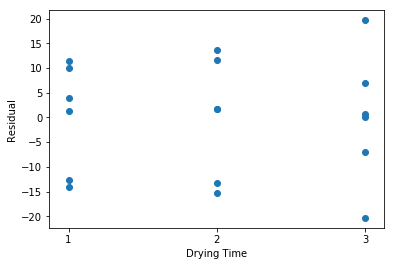

In [27]:
ax = plt.subplot(111)
ax.set_xlabel('Drying Time')
ax.set_ylabel('Residual')
ax.set_xticks([1, 2, 3], minor=False)
plt.scatter(data1.Time, data1.Residuals)

The residuals reasonably track the line in the normal probability plot. Additionally, the distribution of residuals looks fairly consistent across the factors.

## 7. 14-16 a & b

### 14-16 (a) 

In [ ]:
data = pd.read_csv('./14_16.csv')
data

In [ ]:
#start a df for holding calculations
calcs = pd.DataFrame()
calcs['treatments'] = []
calcs['contrasts'] = []
calcs['effects'] = []
calcs['SSs'] = []
calcs['coefficients'] = []
calcs['coeff_ses'] = []
calcs['t_vals'] = []
#calculations
for column in data[0:]:
    treatment = data[column][0]
    contrast = data[column][0:]*data[strength][0:]
    effect = contrast/(n*(2**(k-1)))
    SS = (contrast**2)/(n*(2**k))
    coefficient = effect/2
    coeff_se = MSE*math.sqrt(1/(n*(2**k)))
    t_val = coefficient/coeff_se
    calcs['treatments'].append(treatment)
    calcs['contrasts'].append(contrast)
    calcs['effects'].append(effect)
    calcs['SSs'].append(SS)
    calcs['coefficients'].append(coefficient)
    calcs['coeff_ses'].append(coeff_se)
    calcs['t_vals'].append(t_val)
    



## 8. 14-36 (a) and (b)

### 14-36 (a)

## 9. 14-69 (a) and (b); use $Y = 15 + 1.6x_{1} – 3.2x_{2} + 2.1x+{3} – 1.6x_{4}$ instead of the first-order model in the book.

### 14-69 (a)

## 10. 14-52 (a) and (b)

### 14-52 (a)